# Processing the Image1 Processing

I downloaded and preprocessing the information using a plugin on QGIS (Basically, I converted the jp2 files from Sentinel into a multilayer, I had to use QGIS because the driver JP2 did not work on python). Now, I am going to convert to image.

The preprocessed tif has 3 bands instead of 13 and those are:
 - Band1: From original Band02 --> Blue 
 - Band2: From original Band03 --> Green 
 - Band3: From original Band04 --> Red

# Libraries

In [10]:
import rasterio
from rasterio import plot
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import os
os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\Tutorial_1\Testing_satellite_image\Sentinel_testing_image\Place1")

In [37]:
tif = 'place1.tif'
bands = rasterio.open(tif)
band2 = rasterio.open(tif).read(1) #Blue 
band3 = rasterio.open(tif).read(2) #Green
band4 = rasterio.open(tif).read(3) #Red

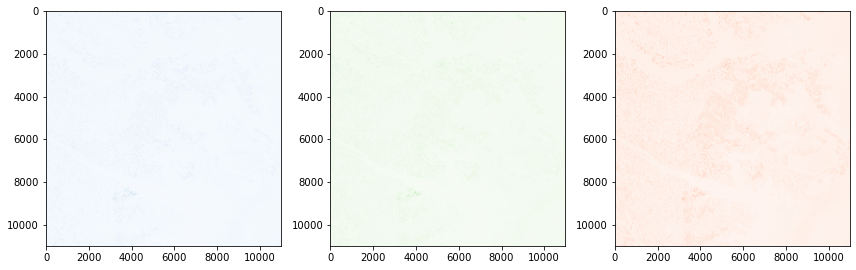

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
plot.show(band2, ax = ax1, cmap='Blues')
plot.show(band3, ax = ax2, cmap='Greens')
plot.show(band4, ax = ax3, cmap='Reds')
fig.tight_layout()

In [38]:
true_color = rasterio.open('true_color_place1.tif','w',driver = 'Gtiff', width = bands.width, height = bands.height,
                          count = 3, crs=bands.crs, transform = bands.transform, dtype=bands.dtypes[0])
true_color.write(band2,3) # Blue
true_color.write(band3,2) # Blue
true_color.write(band4,1) # Blue
true_color.close()

In [40]:
print(band2)
print(band3)
print(band4)

[[691 738 711 ... 412 434 416]
 [659 712 666 ... 427 429 433]
 [659 704 664 ... 408 388 424]
 ...
 [277 284 279 ... 481 444 491]
 [256 257 271 ... 462 476 486]
 [233 257 251 ... 449 481 457]]
[[1022 1076 1082 ...  521  527  517]
 [1008 1066 1072 ...  498  518  512]
 [ 993 1076 1013 ...  512  496  515]
 ...
 [ 463  439  416 ...  609  581  620]
 [ 433  417  440 ...  645  601  600]
 [ 384  427  433 ...  611  606  596]]
[[1188 1230 1168 ...  518  505  503]
 [1160 1230 1114 ...  488  491  494]
 [1154 1232 1048 ...  462  486  505]
 ...
 [ 396  410  416 ...  557  551  568]
 [ 395  405  415 ...  560  539  576]
 [ 345  372  384 ...  534  528  531]]


In [41]:
new = rasterio.open('true_color_place1.tif', count=3)

In [42]:
new.read((1,2,3)) #RGB

array([[[1188, 1230, 1168, ...,  518,  505,  503],
        [1160, 1230, 1114, ...,  488,  491,  494],
        [1154, 1232, 1048, ...,  462,  486,  505],
        ...,
        [ 396,  410,  416, ...,  557,  551,  568],
        [ 395,  405,  415, ...,  560,  539,  576],
        [ 345,  372,  384, ...,  534,  528,  531]],

       [[1022, 1076, 1082, ...,  521,  527,  517],
        [1008, 1066, 1072, ...,  498,  518,  512],
        [ 993, 1076, 1013, ...,  512,  496,  515],
        ...,
        [ 463,  439,  416, ...,  609,  581,  620],
        [ 433,  417,  440, ...,  645,  601,  600],
        [ 384,  427,  433, ...,  611,  606,  596]],

       [[ 691,  738,  711, ...,  412,  434,  416],
        [ 659,  712,  666, ...,  427,  429,  433],
        [ 659,  704,  664, ...,  408,  388,  424],
        ...,
        [ 277,  284,  279, ...,  481,  444,  491],
        [ 256,  257,  271, ...,  462,  476,  486],
        [ 233,  257,  251, ...,  449,  481,  457]]], dtype=uint16)

# Converting to image

In [17]:
import image

ModuleNotFoundError: No module named 'image'